need 
heatmap 
pairplot with highlighted values
go into pairplot
look at any correlation 
plot 3D scatter


In [1]:
import seaborn as sns
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [2]:
od = pd.read_excel('od_cleaned.xlsx')
os = pd.read_excel('os_cleaned.xlsx')

In [3]:
def encode_strings(df,id,values):
    #values is a list of tuples where the pairs are string and encoded value
    for i in values:
        df[id].replace(i[0],i[1], inplace=True)



In [4]:

new_columns = od.iloc[0].to_numpy()

os = os.iloc[1:].reset_index(drop=True)
od = od.iloc[1:].reset_index(drop=True)
os.columns = new_columns
od.columns = new_columns

od['eye'] = 'right'
os['eye'] = 'left'

combined_df = pd.concat([od,os], ignore_index=True)



In [5]:
def encode_strings(df,id,values):
    #values is a list of tuples where the pairs are string and encoded value
    for i in values:
        df[id].replace(i[0],i[1], inplace=True)

encode_strings(combined_df,'Phakic/Pseudophakic',[('crystalline lens has been removed ',0), ('the eye keeps the lens', 1)])
encode_strings(combined_df,'Gender', [('male', 1), ('female',0)])

In [6]:
encode_strings(combined_df, 'Diagnosis', [('glaucoma',0) ,('suspicious', 1), ('healthy', 2)])
combined_df.drop('ID', axis=1, inplace=True)

<Axes: >

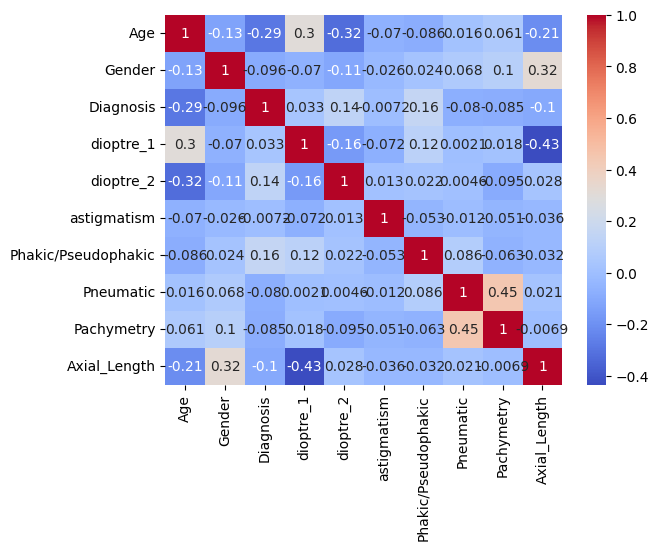

In [7]:
sns.heatmap(combined_df.loc[:,['Age', 'Gender', 'Diagnosis', 'dioptre_1', 'dioptre_2', 'astigmatism',
       'Phakic/Pseudophakic', 'Pneumatic', 'Pachymetry', 'Axial_Length']].corr(), annot= True, cmap= 'coolwarm')

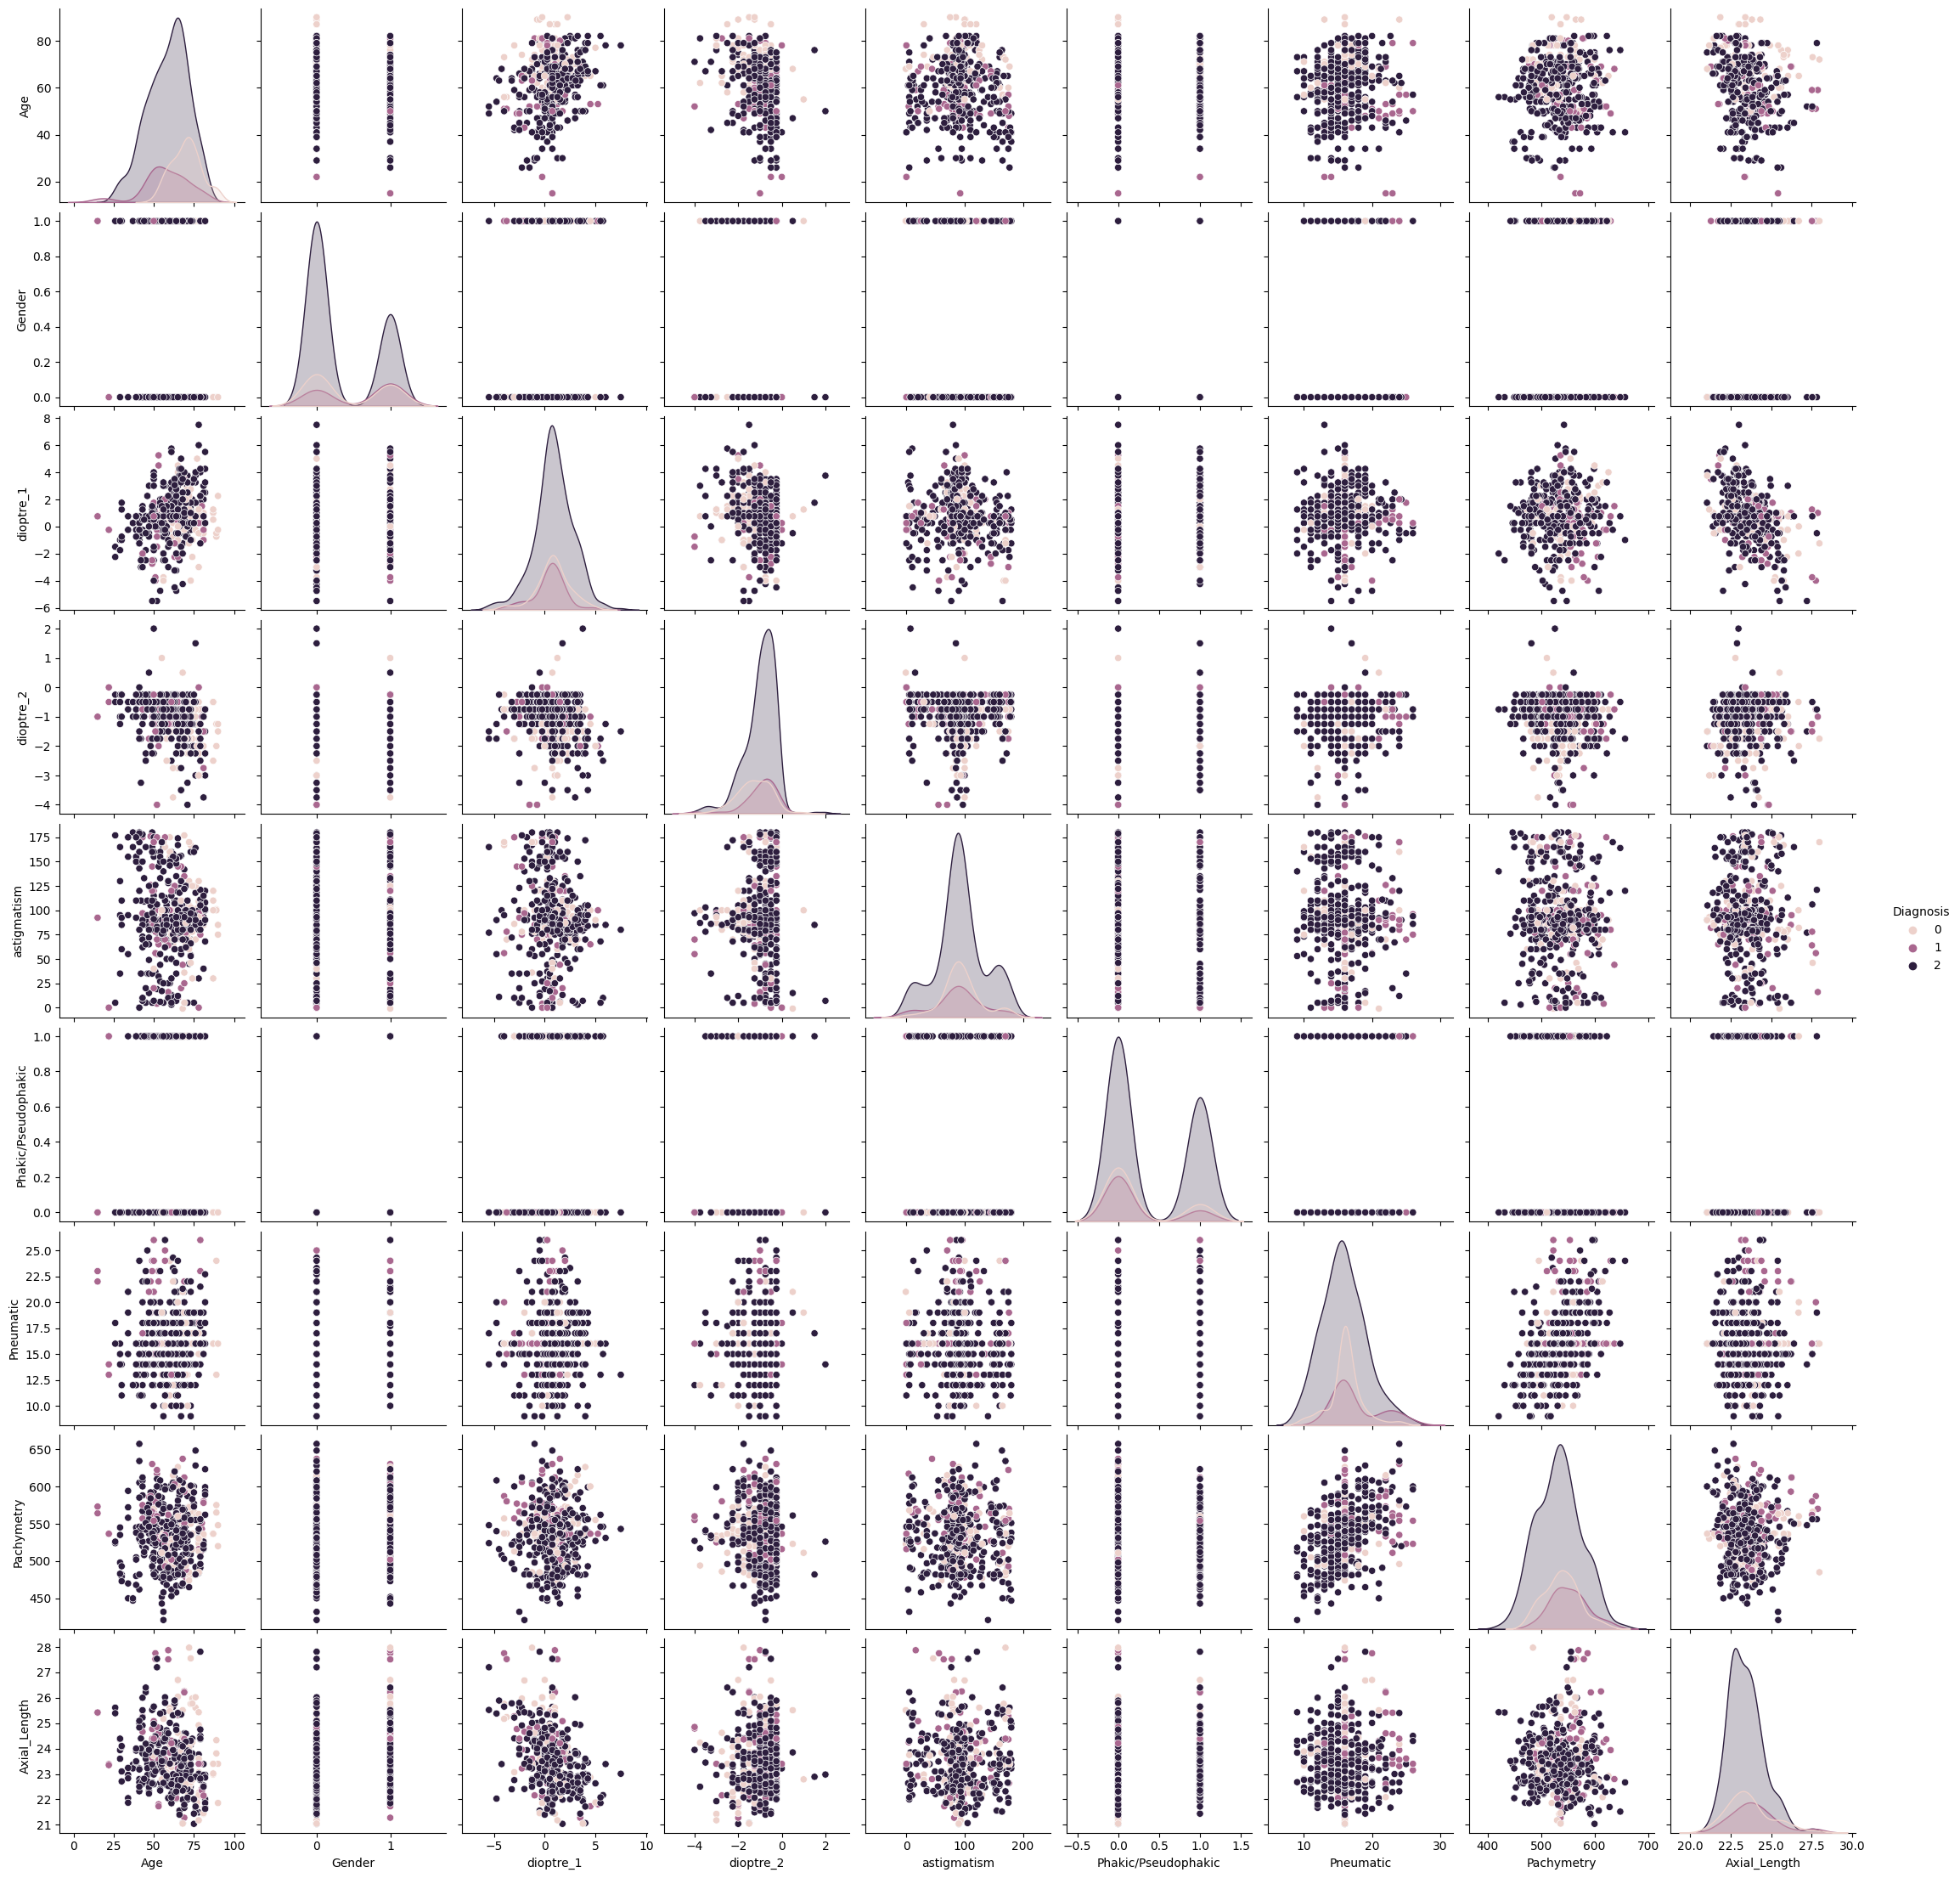

In [8]:
sns.pairplot(combined_df, hue="Diagnosis")

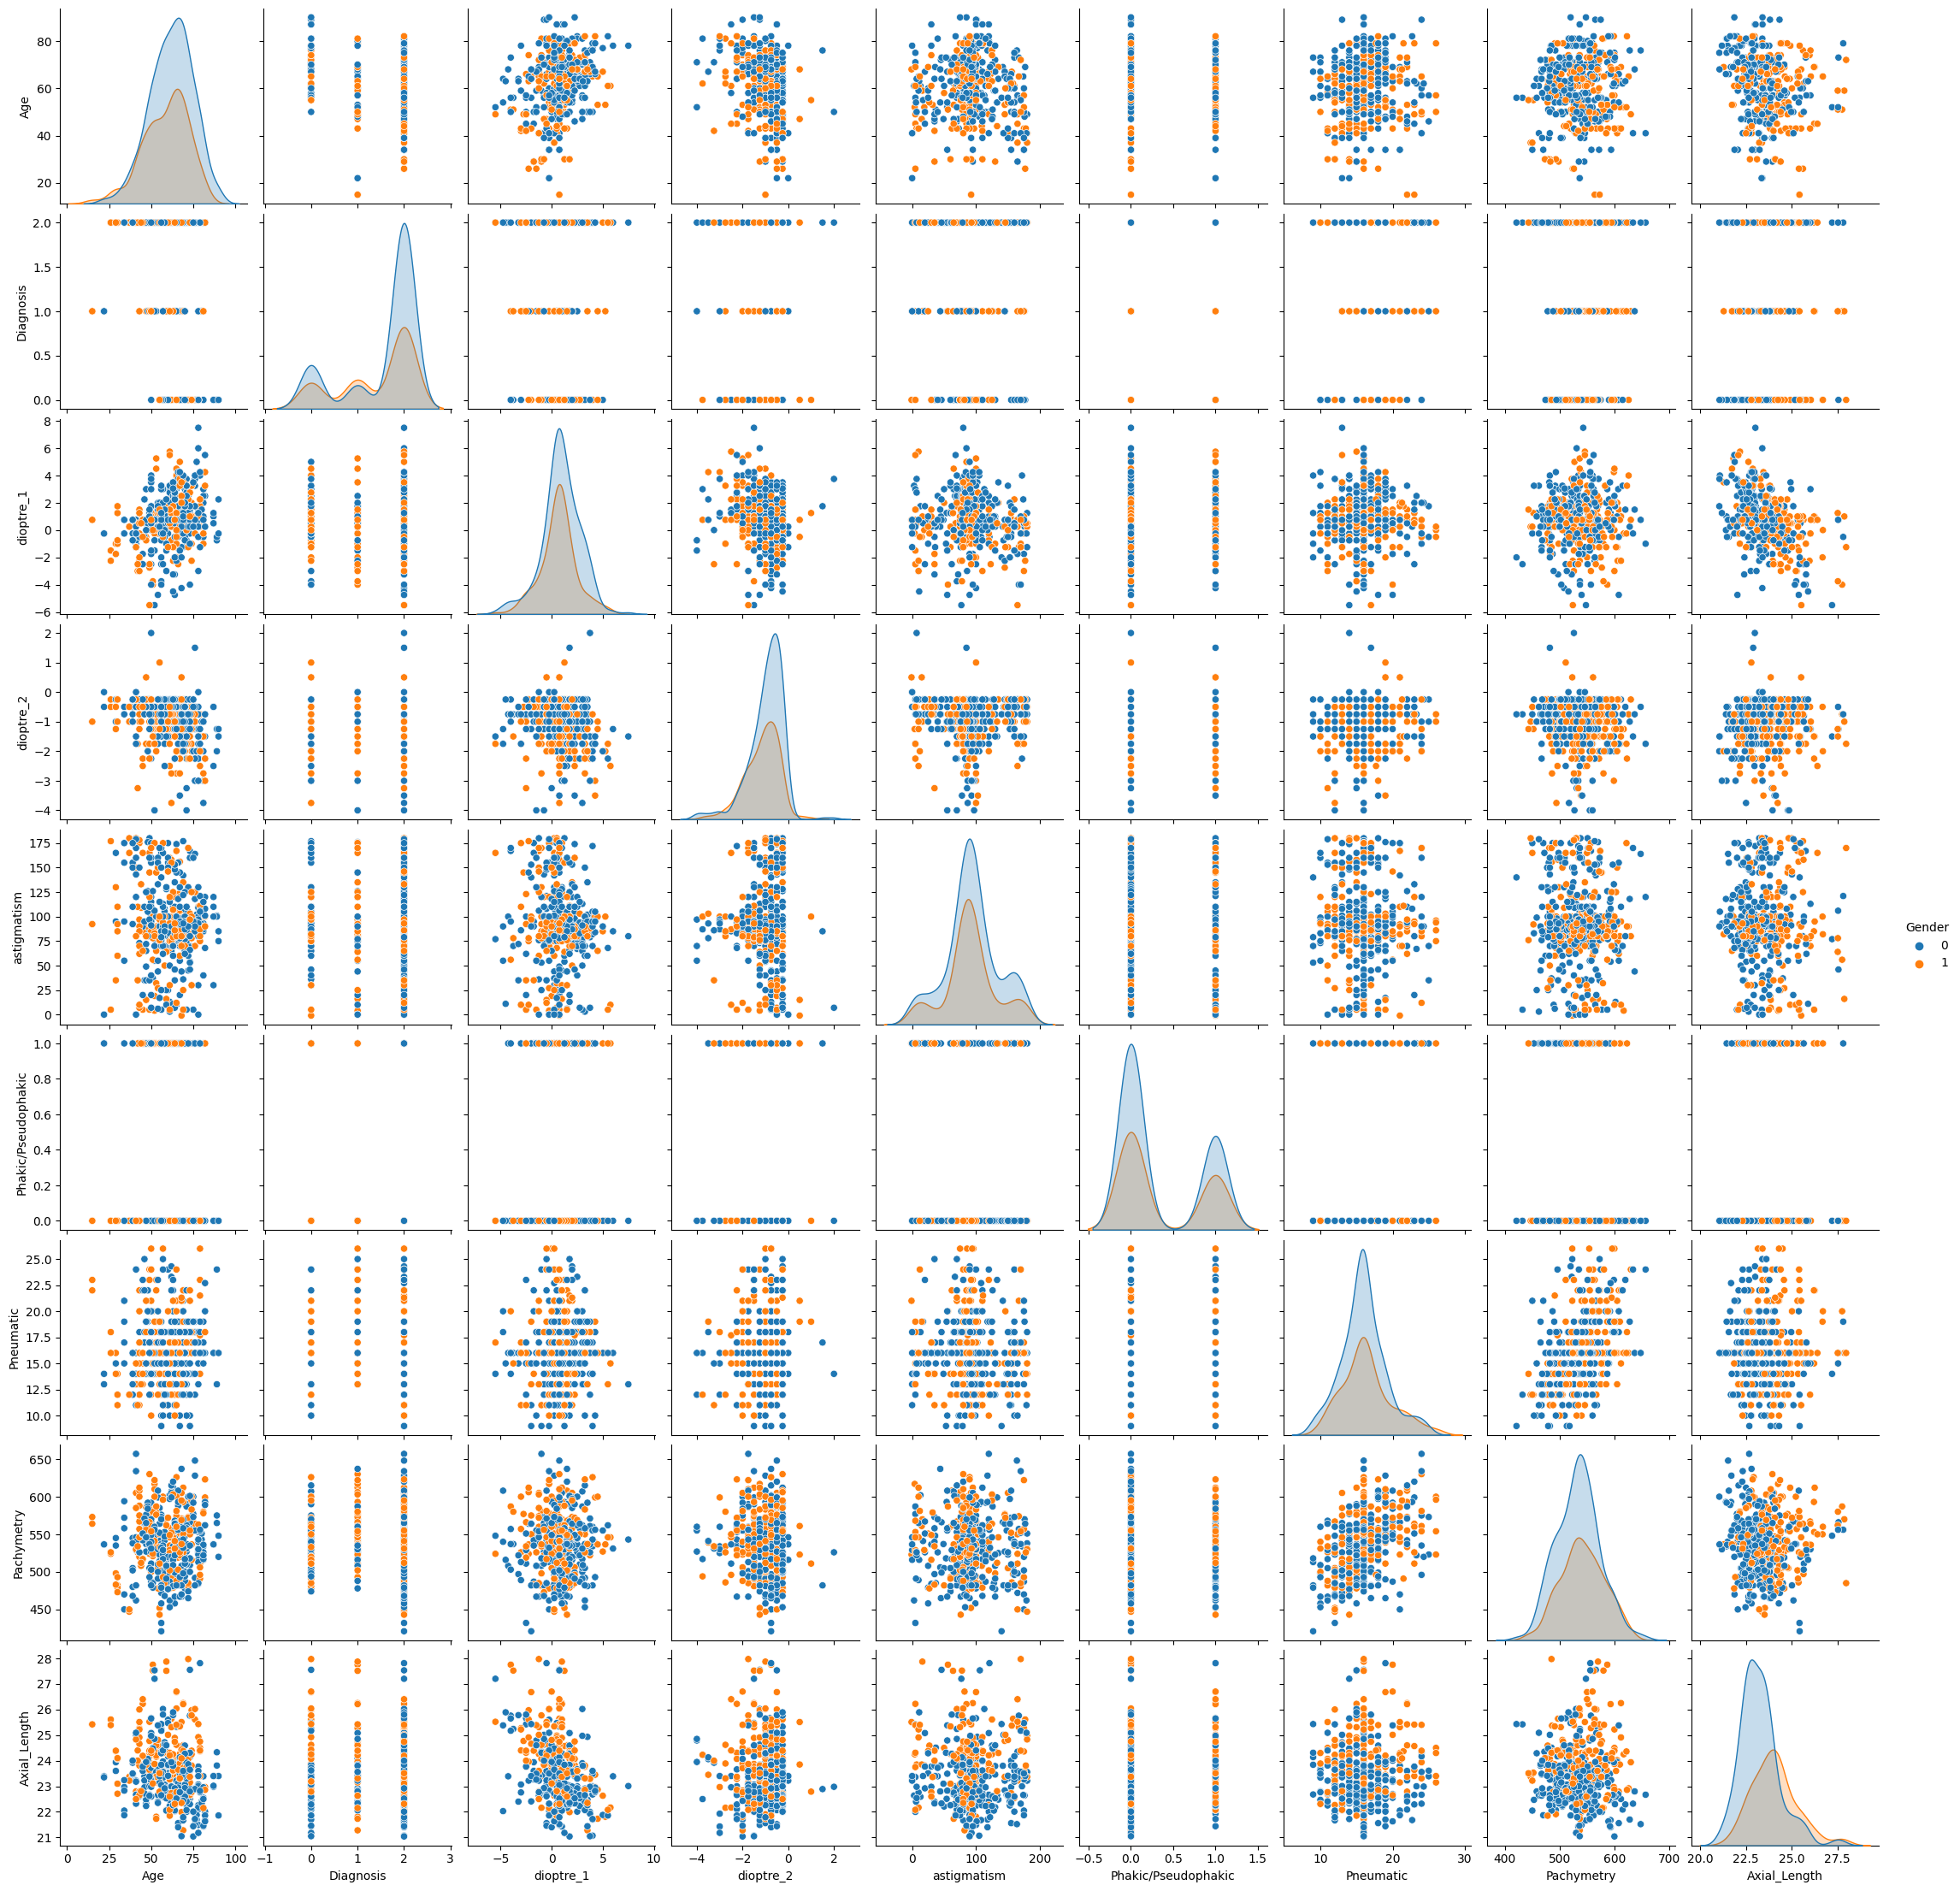

In [9]:
sns.pairplot(combined_df, hue="Gender")

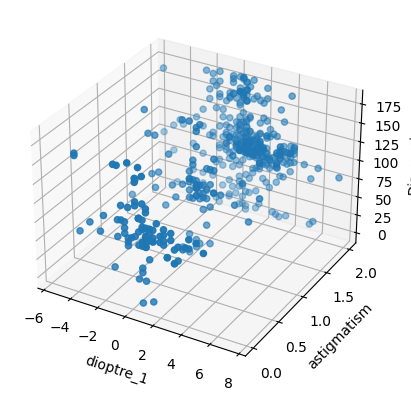

In [10]:

x = combined_df['dioptre_1']
z = combined_df['astigmatism']

y = combined_df['Diagnosis']
# Create a 3D scatter plot
fig = plt.figure()
ax = fig.add_subplot(111, projection='3d')
ax.scatter(x,y,z)

ax.set_xlabel('dioptre_1')
ax.set_ylabel('astigmatism')
ax.set_zlabel('Diagnosis')

plt.show()

In [21]:
healthy = combined_df[combined_df['Diagnosis'] == 2.0]
glaucomatos = combined_df[combined_df['Diagnosis'] == 0.0]
suspicious = combined_df[combined_df['Diagnosis'] == 1.0]


In [23]:
healthy


Age  Gender Diagnosis dioptre_1 dioptre_2 astigmatism Phakic/Pseudophakic   
0    67       1         2       0.5     -0.75         156                   0  \
2    41       1         2     -1.25      -0.5         150                   0   
5    47       0         2      0.75     -0.25          49                   0   
6    49       0         2      1.25     -0.75         180                   1   
7    34       0         2     -0.25     -0.75         175                   0   
..   ..     ...       ...       ...       ...         ...                 ...   
480  64       1         2      0.75      -1.5          93                   0   
481  75       0         2      0.25     -0.25         160                   0   
482  55       1         2       1.5     -1.25          76                   1   
483  56       0         2      1.25     -0.75          79                   1   
484  39       0         2     -0.75     -0.25         110                   1   

    Pneumatic Pachymetry Axial_Length    eye  
0          14        486        25.37  right  
2          13        605         22.8  right  
5          14        537         23.1  right  
6          18        551        23.56  right  
7          21        450        22.05  right  
..        ...        ...          ...    ...  
480        10        531        22.31   left  
481        19        573        22.01   left  
482        14        443        23.51   left  
483         9        479        23.84   left  
484        14        468           24   left  

[331 rows x 11 columns]

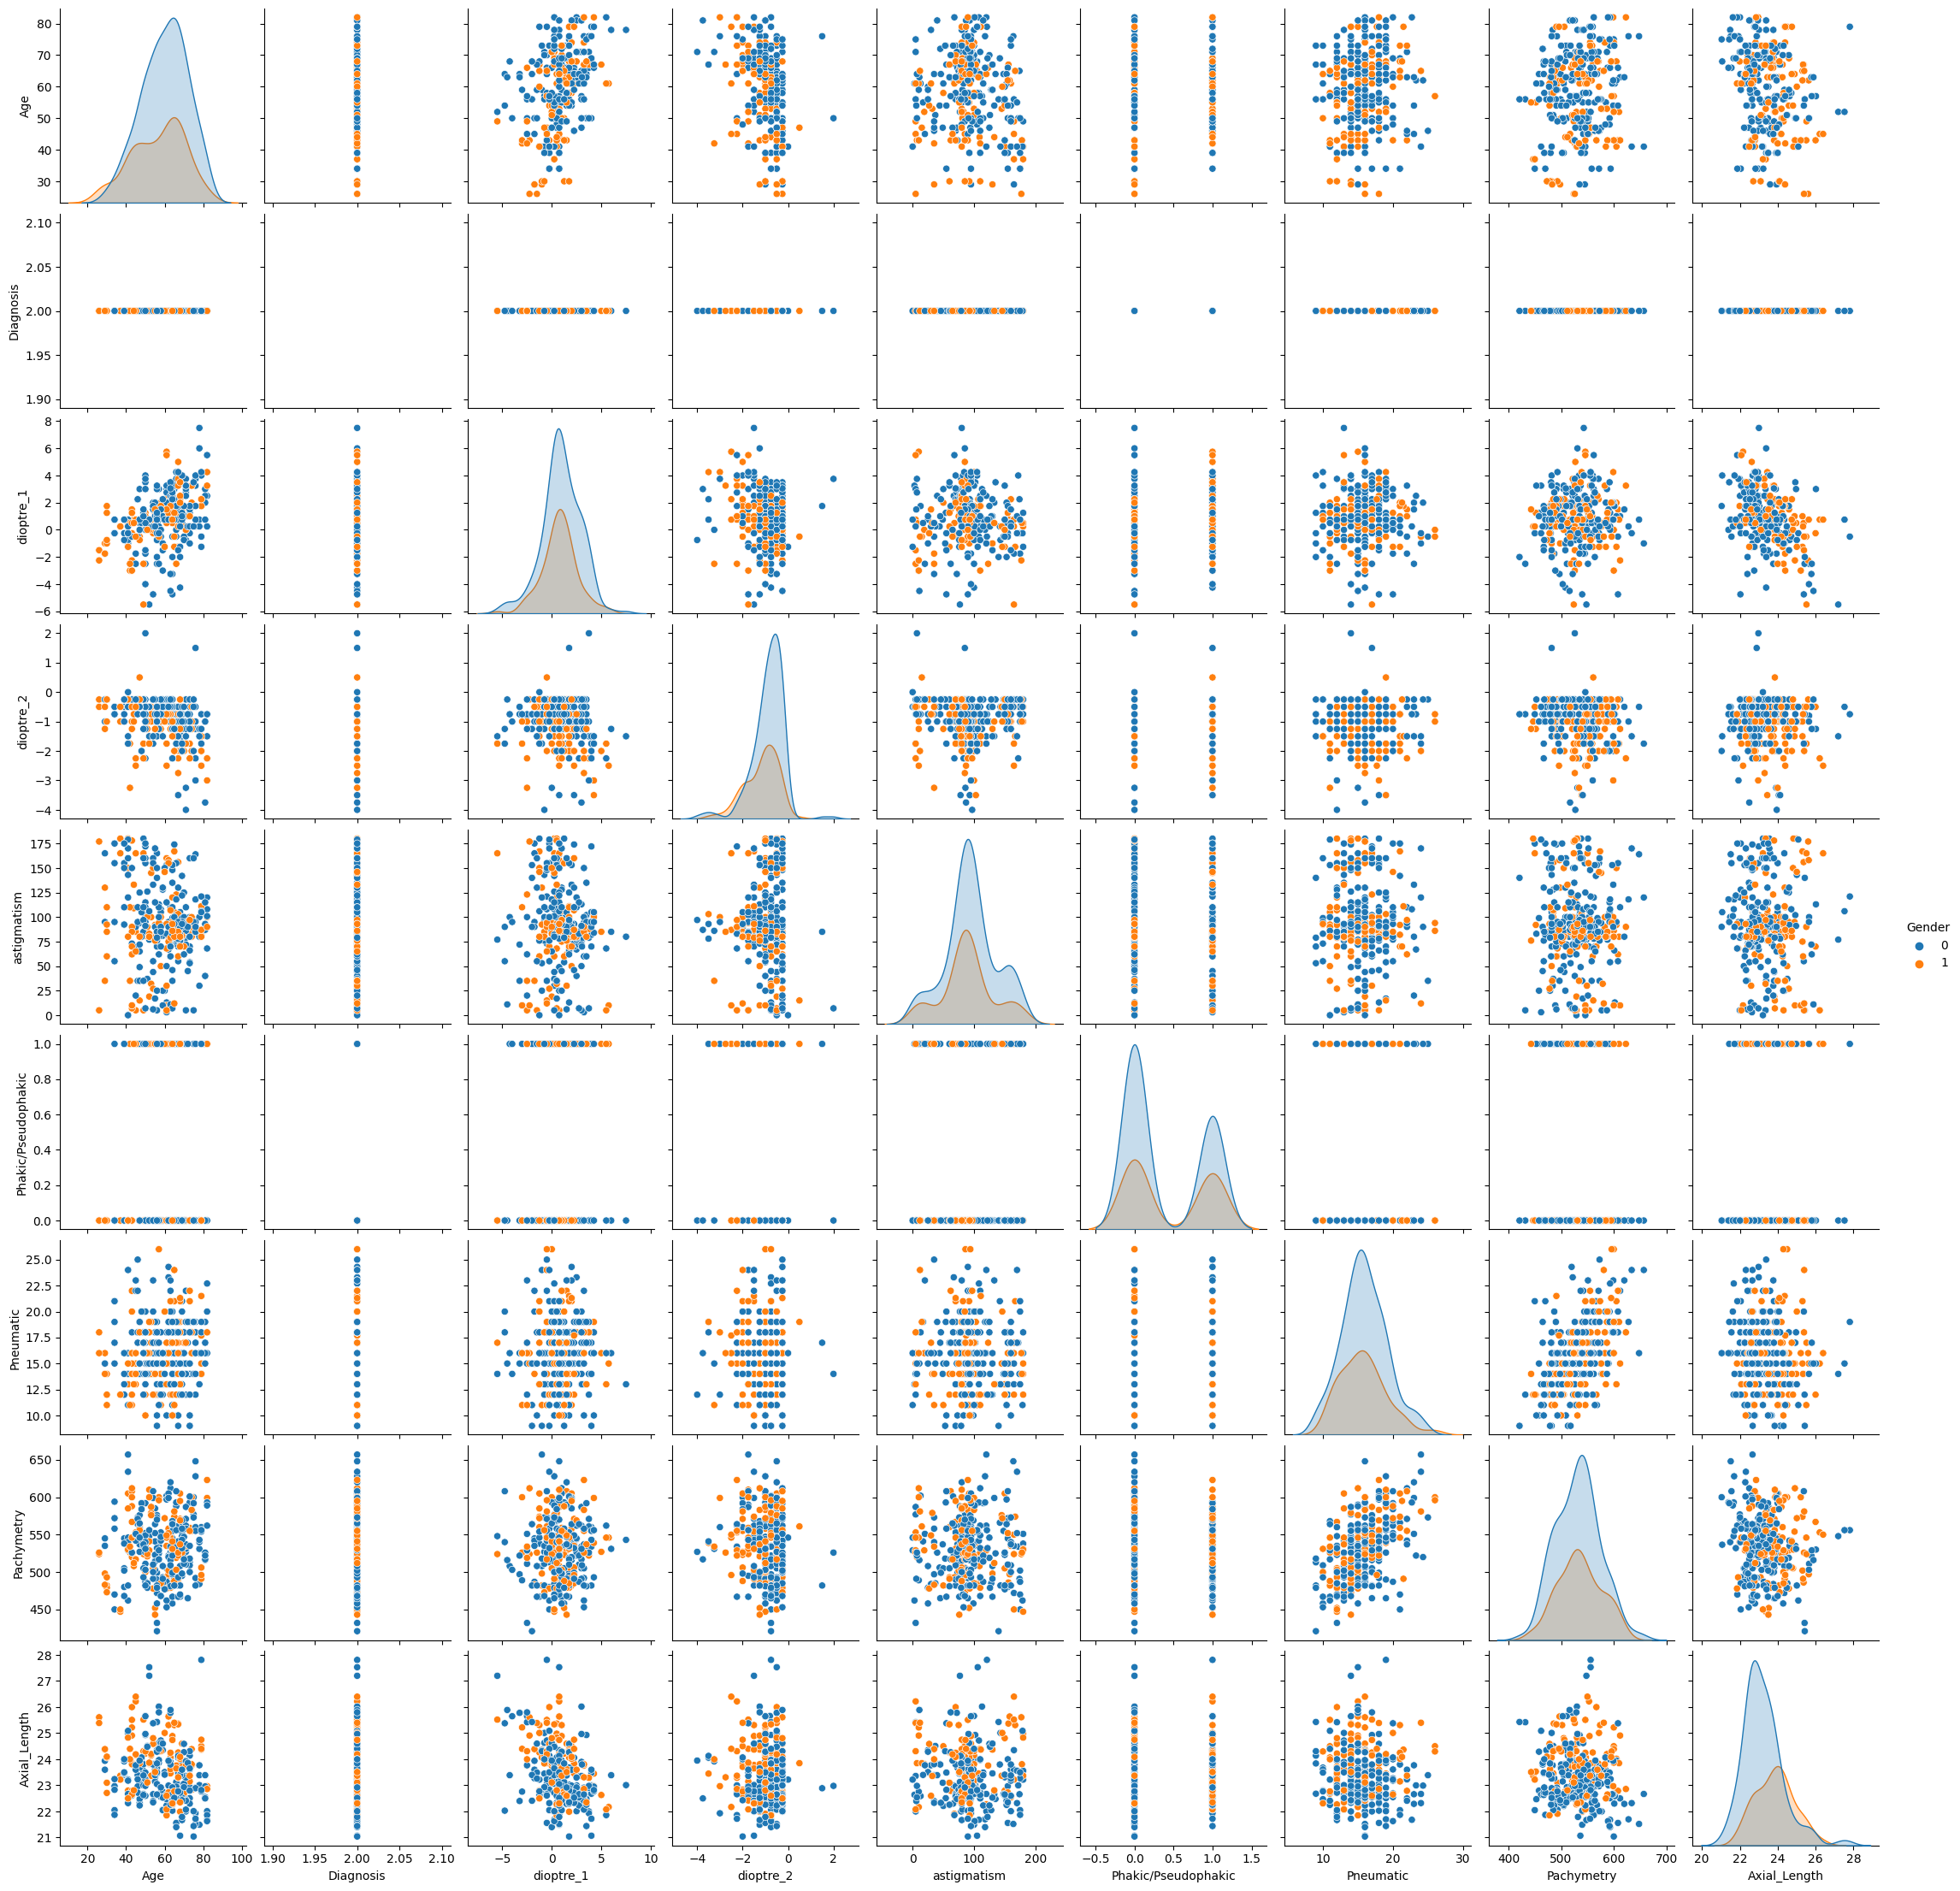

In [24]:
sns.pairplot(healthy, hue="Gender")

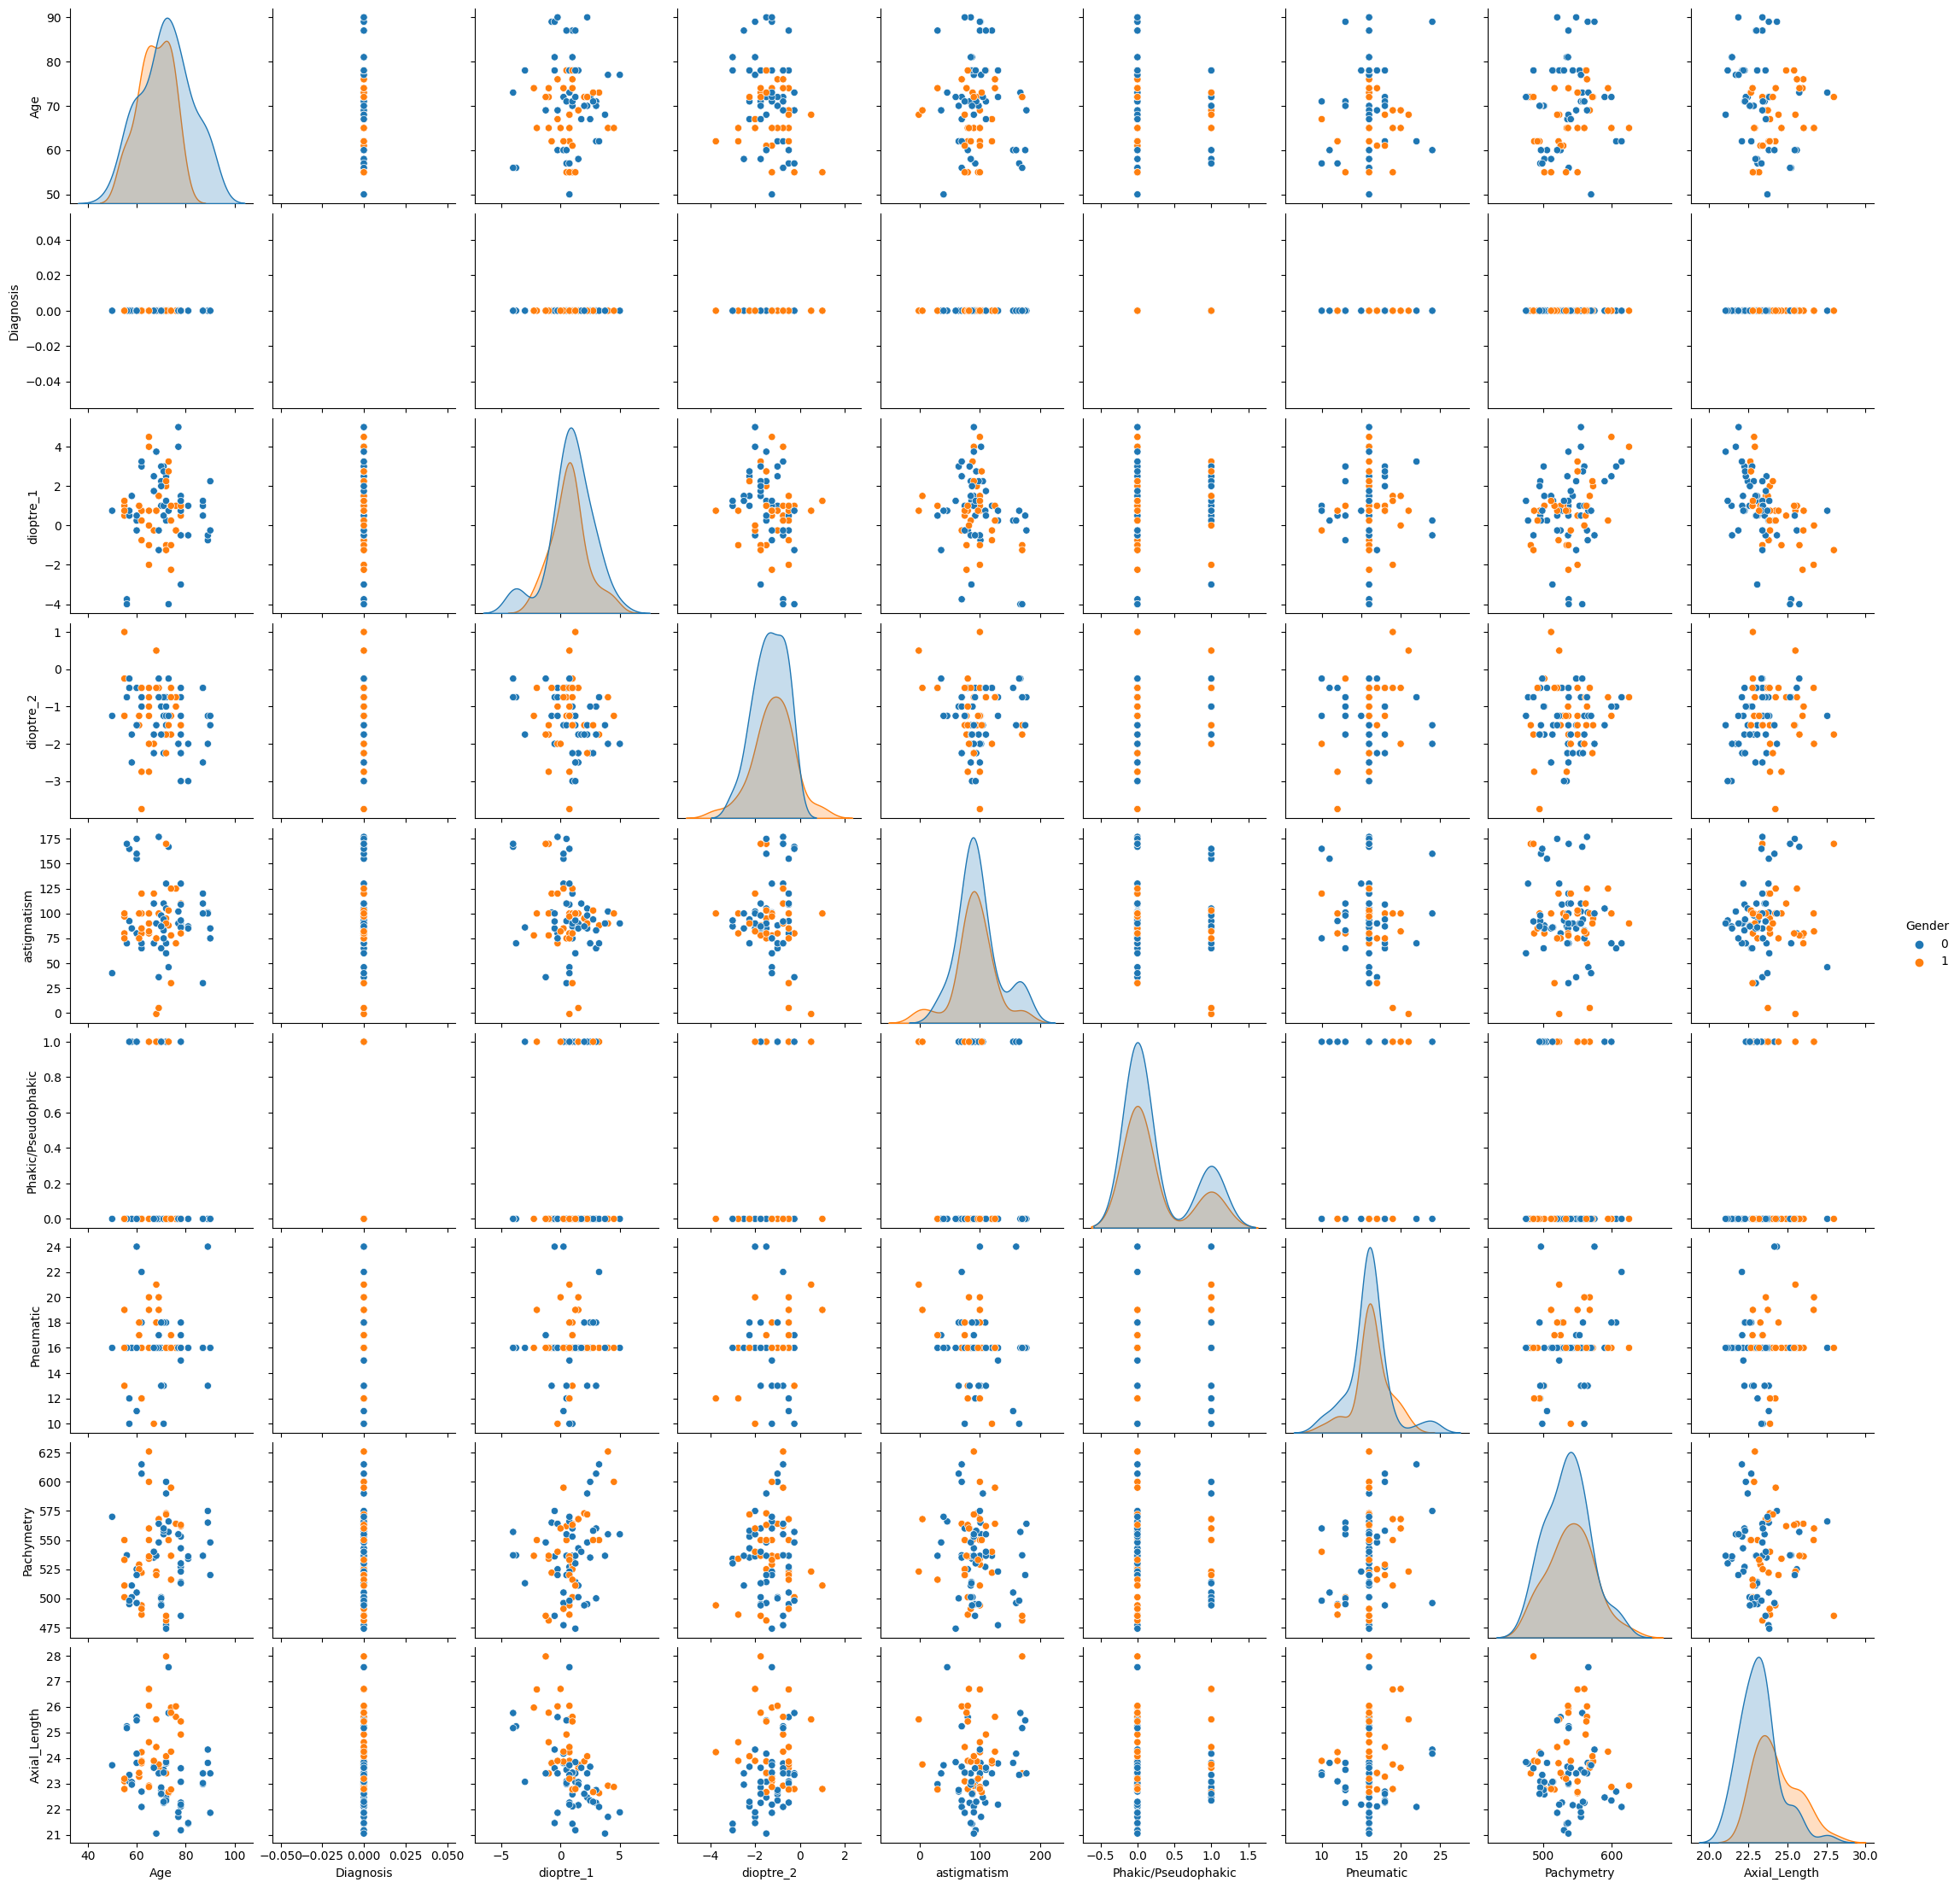

In [25]:
sns.pairplot(glaucomatos, hue="Gender")

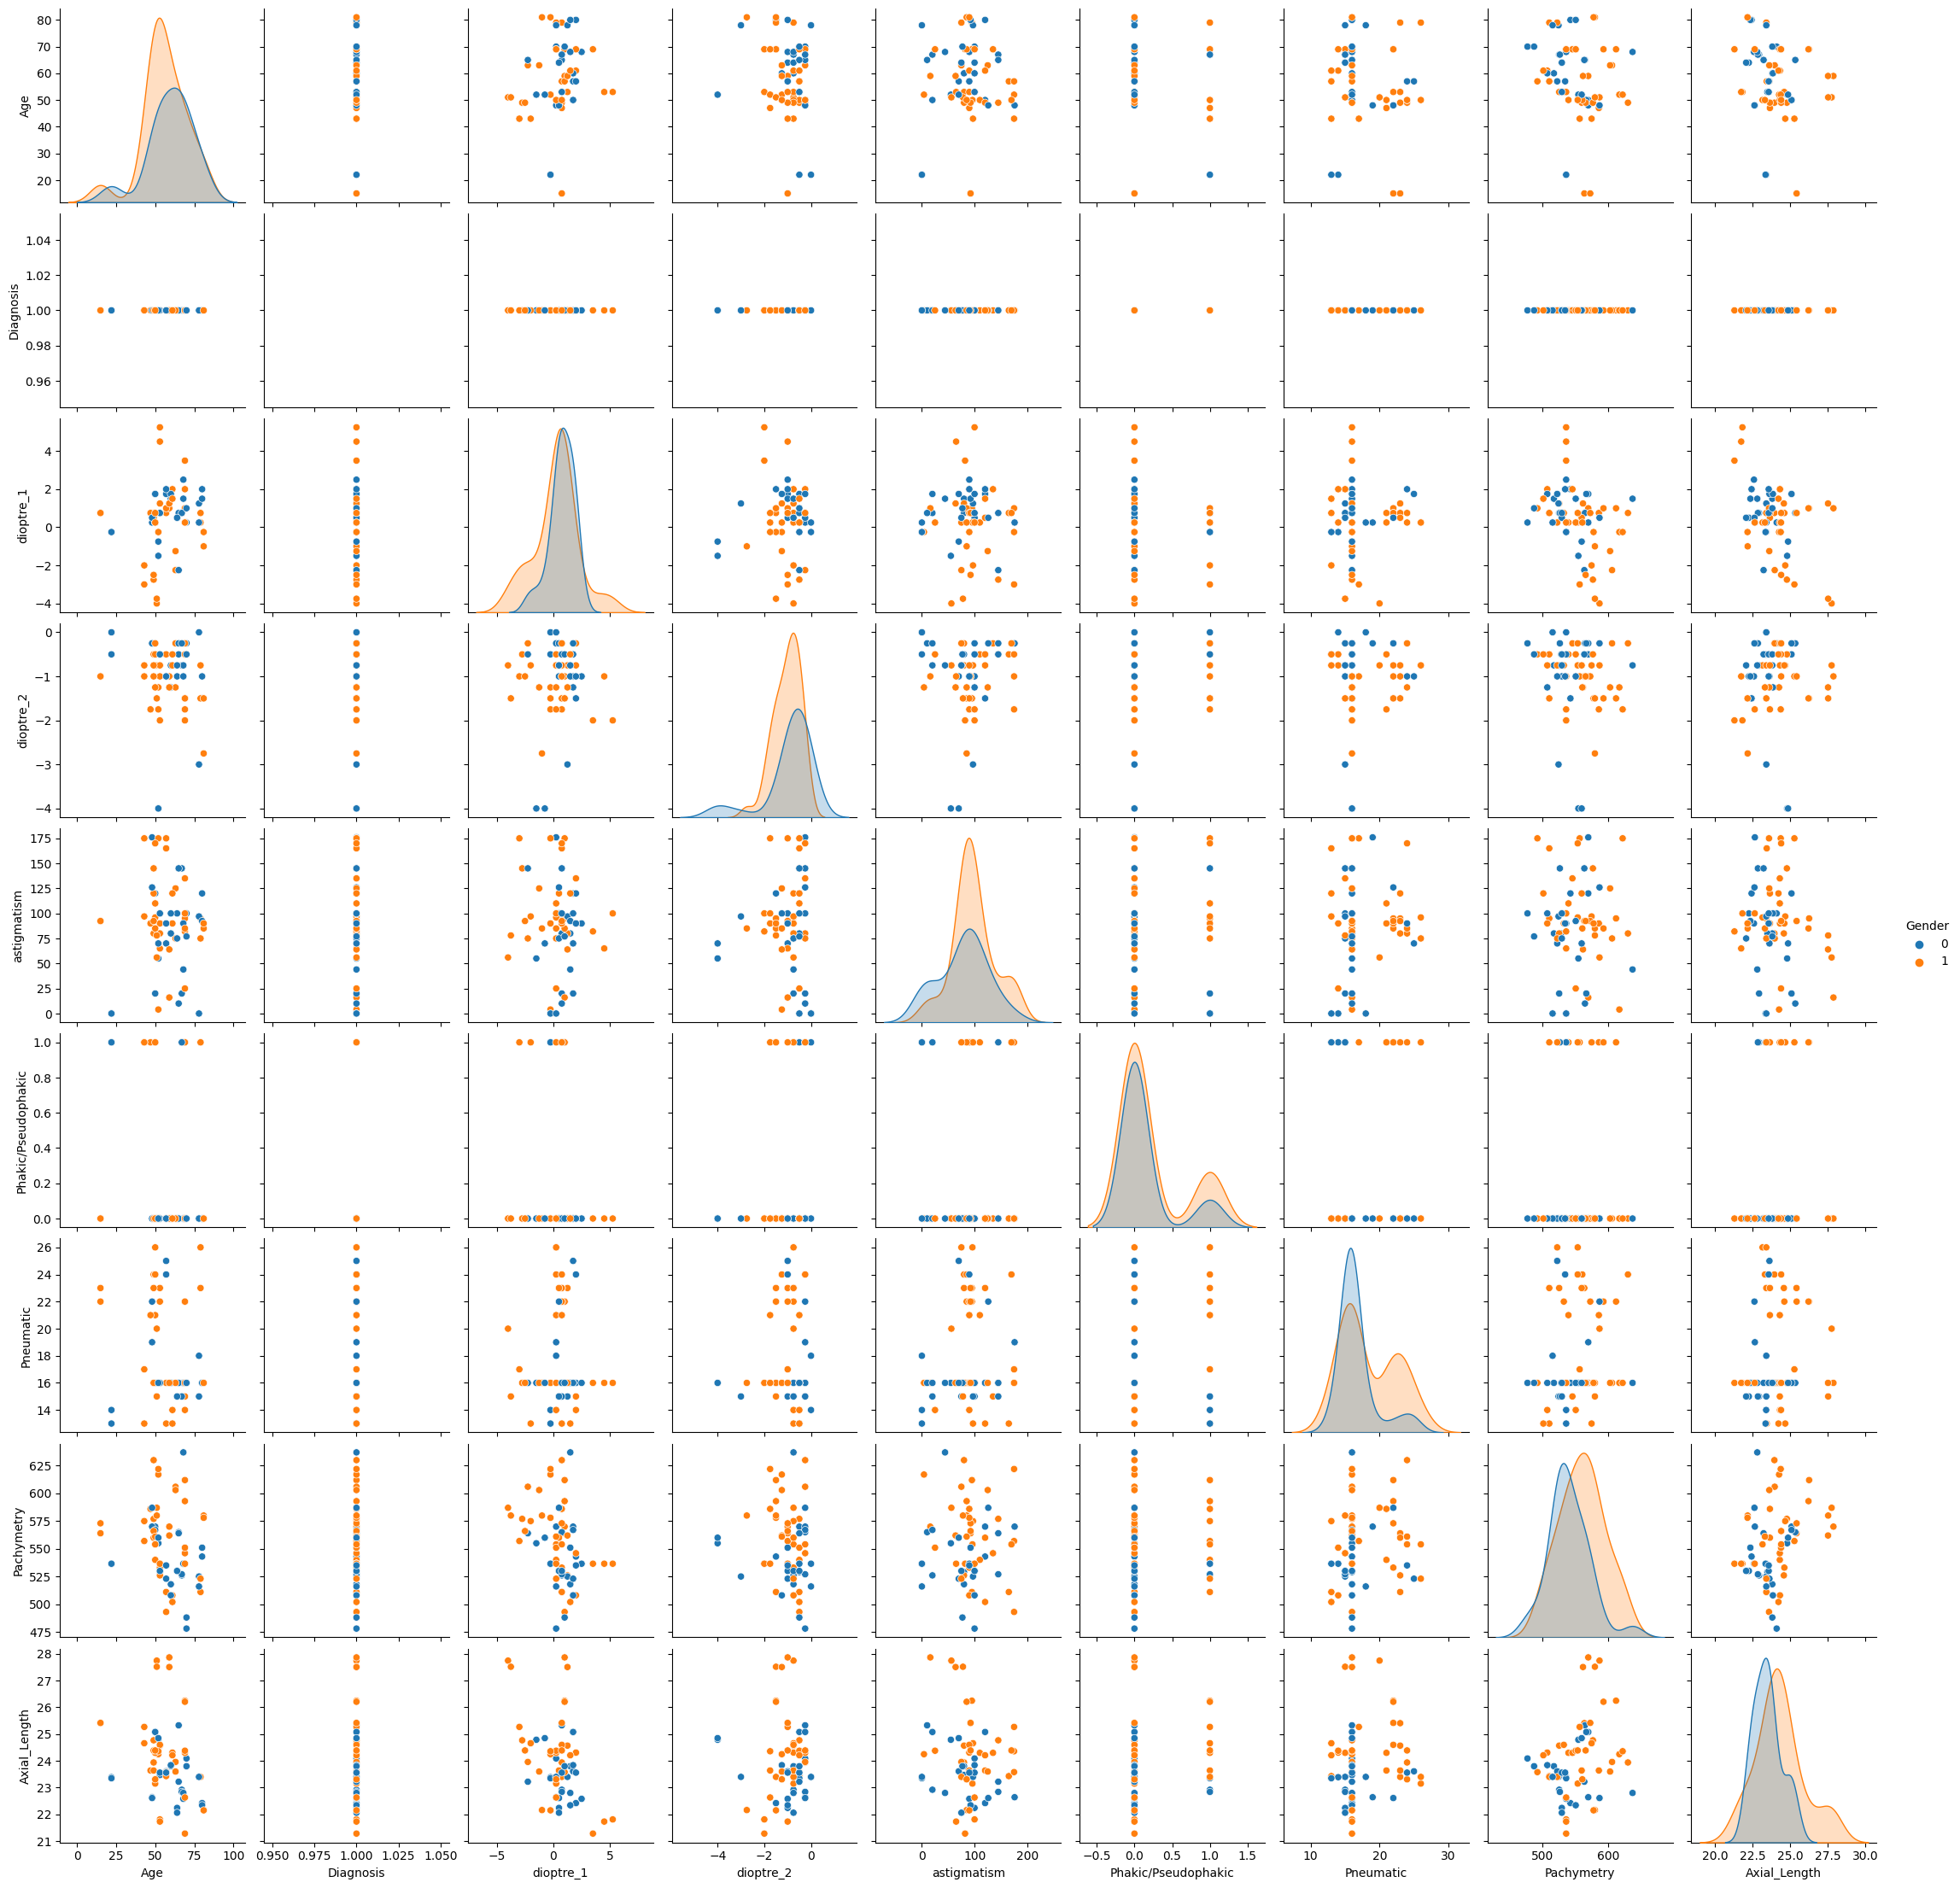

In [26]:
sns.pairplot(suspicious, hue="Gender")

In [28]:
healthy_count = len(combined_df[combined_df['Diagnosis'] == 2])
non_healthy_count = len(combined_df[combined_df['Diagnosis'] != 2])
total_count = len(combined_df)

# Calculate the percentages
healthy_percentage = (healthy_count / total_count) * 100
non_healthy_percentage = (non_healthy_count / total_count) * 100

print(f"Healthy: {healthy_percentage:.2f}%")
print(f"Non-healthy: {non_healthy_percentage:.2f}%")

Healthy: 68.25%
Non-healthy: 31.75%
